# **1 - Carregamento dos dados tratados**
---
Nesta etapa é realizada o carregamento dos dados já tratados previamente

In [1]:
import pandas as pd

df = pd.read_csv('dados_tratados.csv')
df.head()

,Cliente_Inativo,Sexo,Aposentado,Casado,Dependentes,Meses_Contrato,Assinatura_Telefone,Assinatura_MultiTelefone,Assinatura_Internet,Assinatura_Seguro_online,...,Assinatura_Seguro_dispositivo,Assinatura_Suporte_tecnico,Assinatura_TV,Assinatura_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Valor_Mensal,Valor_Diario,Valor_Anual
0,0,0,0,0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,65.6,2.186667,593.30
1,0,1,0,1,1,9,0,1,0,0,...,0,1,1,1,1,1,0,59.9,1.996667,542.40
2,1,1,0,1,1,4,0,0,1,0,...,1,1,1,0,1,0,1,73.9,2.463333,280.85
3,1,1,1,0,1,13,0,0,1,0,...,1,1,0,1,1,0,1,98.0,3.266667,1237.85
4,1,0,1,0,1,3,0,0,1,0,...,0,0,0,0,1,0,0,83.9,2.796667,267.40


# **2 - Análise quantitativa dos cancelamentos**
---
A primeira análise a ser realizada é saber o percentual de cancelamento dos clientes. Utilizanda função *value_counts()* conseguimos realizar a contagem de clientes ativos (=0) e inativos (0). Como mostrado abaixo, tem-se que cerca de 26.6% dos clientes pediram cancelamento do plano. Como é um valor significativamente alto, é necessário realizar algumas avaliações dos perfis dos clientes que solicitaram o cancelamento do plano contratado.


In [2]:
print('----------------------------------')
print('Quantidade de clientes ativos (0) e inativos (1)')
print(df.Cliente_Inativo.value_counts())
print('----------------------------------')
print('Quantidade percentual de clientes ativos (0) e inativos (1)')
print(df.Cliente_Inativo.value_counts(normalize=True).map("{:.1%}".format))
print('----------------------------------')

----------------------------------
Quantidade de clientes ativos (0) e inativos (1)
0    5163
1    1869
Name: Cliente_Inativo, dtype: int64
----------------------------------
Quantidade percentual de clientes ativos (0) e inativos (1)
0    73.4%
1    26.6%
Name: Cliente_Inativo, dtype: object
----------------------------------


# **3 -  Análise correlacional entre os dados**
---
A primeira etapa para a análise será de investigar a relação entre os dados dos clientes como uma forma de identificar o perfil do cliente que pedem cancelamento do plano. Para isto, é utilizada a matriz de correlação para mostrar gráficamente se há correlação entre os dados dos clientes.

Com base no gráfico apresentado abaixo, é possível observar que:

1. Os clientes que possuem ***assinatura de TV*** também tendem a assinar os serviços de ***backup***, ***suporte técnico***, ***internet***, ***seguro online***, ***seguro do dispositivo móvel*** e o de ***filmes.***
2. Em particular, os clientes que assinam os serviços de ***seguro,*** tanto o online quanto o do dispositivo móvel, tendem a preferir pela a optar pela cobrança online.
3. Os clientes que assinam os serviços de telefone, tanto o da linha normal quanto o multi-linha, não apresentam interesse em adquirir os demais serviços
4. O perfil dos clientes inativos indicam uma significativa correlação negativa com o valor anual do plano. Enquanto que apresentam uma correlação positiva com o valor mensal. Este comportamento precisa ser avaliado com mais detalhes.
5. A coluna de clientes inativos apresenta uma correlação negativa com a coluna de ***Meses_Contrato*** que indica o tempo do contrato em meses. Enquanto apresenta uma correlação positiva com a coluna ***dependentes***.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio # Para imprimir e salvar as imagens
from biokit.viz import corrplot # Para a plotagem da matriz de correlação

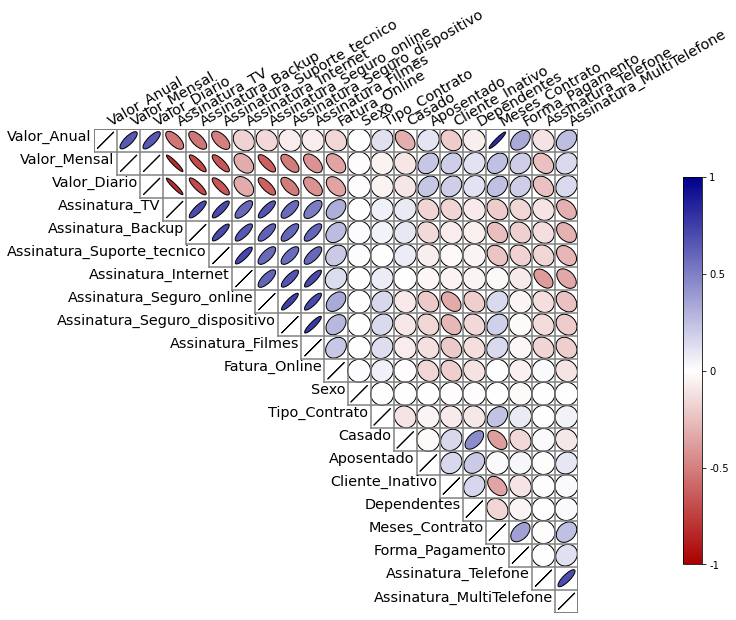

In [4]:
# Avaliando graficamente
matriz_corr = df.corr()
corr_graph = corrplot.Corrplot(matriz_corr)
corr_graph.plot(upper='ellipse',fontsize='x-large',shrink=1)
fig = plt.gcf()
fig.set_size_inches(90,15)

# **4 - Análise gráfica do perfil dos clientes**
---

A próxima etapa é avaliar gráficamente a relação entre as variáveis e o perfil do cliente que solicita o cancelamento do plano.

## **4.1 - Análise da evasão de clientes**

O gráfico abaixo exibe o resultado já observado anteriormente, onde um pouco mais de 26% dos clientes pediram o cancelamento do plano.

In [5]:
# Criadno um dataframe temporário para plotar o gráfico de evasão de clientes
df_inativo = df.Cliente_Inativo.value_counts(normalize=True)*100
df_inativo = df_inativo.to_frame().reset_index()
df_inativo.columns = ['Situação do cliente', 'Percentual']
df_inativo['Situação do cliente'] = df_inativo['Situação do cliente'].map({0:'Ativo', 1:'Inativo'})
df_inativo['Percentual'] = df_inativo['Percentual'].round(1)

fig = px.bar(df_inativo, x = df_inativo['Situação do cliente'], y = df_inativo['Percentual'], color = "Situação do cliente", text='Percentual',
    title="Avaliação da taxa de evasão dos clientes")
fig.update_traces(textfont_size=16, textangle=0, textposition="inside", cliponaxis=False, opacity=0.8, marker_line_width=1.5,
    marker_line_color = 'rgb(0,0,0)')
fig.show()

## **4.2 - Perfil de gastos dos clientes**

A primeira hipótese é verificar se o valor do plano adotado influencia na tomada de decisão do cliente. Assim, é analisada o perfil de dos valores mensais e anuais dos planos adquiridos e a porcentagem de clientes que estão inativo para cada faixa de valor. 

### **4.2.1 - Perfil de gasto mensal dos clientes**

O gráfico a seguir apresenta o histograma dos valores mensais dos planos e a respectiva porcentagem de cancelamento (indicada em cor vermelha). Pode-se que:

1. Os planos com valores mensais abaixo de $ 20,00 apresentam as mais altas taxas de cancelamentos, cerca de 37%.
2. Os demais planos apresentam a taxa dee cancelamento próximo da média já observada, que é de 25%.

In [6]:
# Avaliação em relação ao custo mensal do plano
df_gastos = df.Valor_Mensal.value_counts()
df_gastos = df_gastos.to_frame().reset_index()
df_gastos.columns = ['Valor mensal do plano', 'Quantidade']
df_gastos['Situação do cliente'] = df.Cliente_Inativo
df_gastos['Situação do cliente'] = df_gastos['Situação do cliente'].map({0:'Ativo', 1:'Inativo'})


fig = px.histogram(df_gastos, x="Valor mensal do plano", color = "Situação do cliente", nbins = 8,
    title="Situação dos clientes em relação ao custo mensal do plano", histnorm = None, barnorm = 'percent')
fig.update_traces( opacity=0.8, marker_line_width=1.5, marker_line_color = 'rgb(0,0,0)')
fig.update_layout(bargap=0.05)
fig.show()

### **4.2.2 - Perfil de gasto total dos clientes**

Já em relação ao gasto anual, não há  diferença significativa para ataxa de cancelamento. Para toso os grupos, a média ficou em torno de 25% dos clientes pedindo cancelamento. 

In [7]:
# # Avaliação em relação ao custo anual total do plano
df_gastos = df.Valor_Anual.value_counts()
df_gastos = df_gastos.to_frame().reset_index()
df_gastos.columns = ['Valor anual total do plano', 'Quantidade']
df_gastos['Situação do cliente'] = df.Cliente_Inativo
df_gastos['Situação do cliente'] = df_gastos['Situação do cliente'].map({0:'Ativo', 1:'Inativo'})


fig = px.histogram(df_gastos, x="Valor anual total do plano", color = "Situação do cliente", nbins = 10,
    title="Situação dos clientes em relação ao custo anual total do plano", barnorm='percent')
fig.update_traces( opacity=0.8, marker_line_width=1.5, marker_line_color = 'rgb(0,0,0)')
fig.update_layout(bargap=0.05)
fig.show()

### **4.2.3 - Valor médio mensal do contrato por cliente**

O gráfico abaixo mostra o valor mensal médio pago dos clientes ativo e inativos. Este resultado mostra que, no geral, os clientes que pediram cancelamento estavam pagando cerca de $ 13,00 a mais que os clientes que ainda estão ativos. Isto indica que o valor do plano tem forte influência no pedido de cancelamento. Em outras palavras, os clientes que estão inativos provavelmente estão migrando para outros planos mais em conta de outras empresas.

In [8]:
# Criando e organizando o dataframe de plotagem
data_aux = df[['Cliente_Inativo', 'Valor_Mensal', 'Valor_Anual']].groupby('Cliente_Inativo').mean().round(2)
data_aux = [ ['Ativo'   , data_aux['Valor_Mensal'][0] , data_aux['Valor_Anual'][0]], 
             ['Inativo' , data_aux['Valor_Mensal'][1] , data_aux['Valor_Anual'][1] ] ]
df_media_gastos = pd.DataFrame(data_aux, columns = ['Situação do cliente', 'Valor mensal médio do plano', 'Valor total médio do plano'])

# Plotando em gráfico de barras
fig = px.bar(df_media_gastos, x = df_media_gastos['Situação do cliente'], y = df_media_gastos['Valor mensal médio do plano'], 
    color = 'Situação do cliente' ,text='Valor mensal médio do plano', title="Índice de cancelamento por valor médio mensal do plano contratado")
fig.update_traces(textfont_size=16, textangle=0, textposition="inside", cliponaxis=False, opacity=0.8, marker_line_width=1.5,
    marker_line_color = 'rgb(0,0,0)')
fig.show()

# Para salvar a imagem
# pio.write_image(fig, 'image.png',scale=6, width=1080, height=1080)

### **4.2.4 - Valor médio anual do contrato por cliente**

O gráfico abaixo exibe a média do plano anual pago pelos clientes ativos e inativos. Diferentemente do que foi observado anteriormente, o perfil dos clientes inativos pagavam, em média, um valor anual menor que os clientes ainda ativos. Isto pode indicar que os clientes que aderem a mais serviços da empresa tendem a permanecer na empresa.

In [9]:
# Plotando em gráfico de barras
fig = px.bar(df_media_gastos, x = df_media_gastos['Situação do cliente'], y = df_media_gastos['Valor total médio do plano'], 
    color = 'Situação do cliente' ,text='Valor total médio do plano', title="Índice de cancelamento por valor médio anual do plano contratado")
fig.update_traces(textfont_size=16, textangle=0, textposition="inside", cliponaxis=False, opacity=0.8, marker_line_width=1.5,
    marker_line_color = 'rgb(0,0,0)')
fig.show()

## **4.3 - Tempo de contrato**

O tempo de contrato dos clientes tambem é avaliado para definir se o fator de fidelização tem influência na permanência do cliente.

### **4.3.1 - Tempo total de contrato**

In [10]:
# Dataframe de plotagem
df_contrato = df.Meses_Contrato.value_counts()
df_contrato = df_contrato.to_frame().reset_index()
df_contrato.columns = ['Duração do plano', 'Quantidade']
df_contrato['Situação do cliente'] = df.Cliente_Inativo
df_contrato['Situação do cliente'] = df_contrato['Situação do cliente'].map({0:'Ativo', 1:'Inativo'})

# Plotagem do histograma
fig = px.histogram(df_contrato, x="Duração do plano", color = "Situação do cliente", nbins = 6,
    title="Situação dos clientes em relação à duração do contrato", barnorm='percent')
fig.update_traces( opacity=0.8, marker_line_width=1.5, marker_line_color = 'rgb(0,0,0)')
fig.update_layout(bargap=0.05)
fig.show()

### **4.3.2 - Primeiro ano de contrato**

Plotando o histograma para o perfil dos clientes com menos de 1 ano de contrato, é possível observar que cerca de 62% dos clientes pedem cancelamento no primeiro mês de serviço. Isto pode indicar uma falha na instalação, cobrança ou atendimento que comprometam a satisfação do cliente ao aderir ao plano. A medida que o tempo de contrato vai aumentando, o percentual de clientes que vão pedindo o cancelamento vai diminuindo e se aproximando da média, que é de 25%.

In [11]:
# Avaliando somente os clientes com 1 e 2 anos de contrato
clientes_1y = df.query('Meses_Contrato <= 12')
clientes_1y = clientes_1y[['Cliente_Inativo','Meses_Contrato','Valor_Mensal','Valor_Anual']]
clientes_1y.columns = ['Situação do cliente','Duração do plano', 'Valor mensal do plano','Valor anual do plano']
clientes_1y['Situação do cliente'] = clientes_1y['Situação do cliente'].map({0:'Ativo', 1:'Inativo'})

# Plotando
fig = px.histogram(clientes_1y, x="Duração do plano", color = "Situação do cliente", nbins = 6,
    title="Situação dos clientes em relação à duração do contrato", barnorm='percent')
fig.update_traces( opacity=0.8, marker_line_width=1.5, marker_line_color = 'rgb(0,0,0)')
fig.update_layout(bargap=0.05)
fig.show()

### **4.3.3 - Segundo ano de contrato**

Para o clientes com o tempo de contrato entre 1 e 2 anos, observa-se que, no geral, o índice de cancelamento é alto exibindo valores acima de 65%. Em especial, este índice se aproxima de 75% com o tempo de contrato perto de 2 anos. 

In [12]:
clientes_2y = df.loc[df['Meses_Contrato'].between(13,24,inclusive='both')]
clientes_2y = clientes_2y[['Cliente_Inativo','Meses_Contrato','Valor_Mensal','Valor_Anual']]
clientes_2y.columns = ['Situação do cliente','Duração do plano', 'Valor mensal do plano','Valor anual do plano']
clientes_2y['Situação do cliente'] = clientes_2y['Situação do cliente'].map({0:'Ativo', 1:'Inativo'})

# Plotando
fig = px.histogram(clientes_2y, x="Duração do plano", color = "Situação do cliente", nbins = 8,
    title="Situação dos clientes em relação à duração do contrato", barnorm='percent')
fig.update_traces( opacity=0.8, marker_line_width=1.5, marker_line_color = 'rgb(0,0,0)')
fig.update_layout(bargap=0.05)
fig.show()

## **4.4 - Relação da taxa de cancelamento com a qualidade do serviço**

### **4.4.1 - Serviço de telefone**

In [27]:
df_plot = df[['Cliente_Inativo','Assinatura_Telefone','Assinatura_MultiTelefone']]

In [ ]:

fig = px.histogram(df_plot, x="Assinatura_Telefone", color = "Cliente_Inativo",
    title="Situação dos clientes em relação à duração do contrato", barnorm='percent')
fig.update_traces( opacity=0.8, marker_line_width=1.5, marker_line_color = 'rgb(0,0,0)')
fig.update_layout(bargap=0.05)
fig.show()